In [2]:
# importing the required module
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20})

In [3]:
def movingaverage(interval, window_size):
    window = np.ones(int(window_size))/float(window_size)
    return np.convolve(interval, window, 'same')

def posBox(lst):
    return [ x for x in lst if x > 0] or None

def perAddedDelay(num1, num2): 
    return ((num1/num2)-1)*100



In [4]:
#
# Deregistration Import
#

# 25 UEs in parallel
lb25dereg = pd.read_csv(r"E:\Uni\Plotting\LB\with-lb-25\ueDeregistTimingsGNB1.csv")
lg25dereg = pd.read_csv(r"E:\Uni\Plotting\LB\with-lb-25\ueGNBDeregTimingsGNB1.csv")
gnb25dereg = pd.read_csv(r"E:\Uni\Plotting\gnb-with-LB\with-lb-25-trace-dump\2022-04-01_124502-dereg-1.csv")
gnbsolo25dereg = pd.read_csv(r"E:\Uni\Plotting\gnb-without-LB\wo-lb-25-trace-dump\2022-04-01_131555-dereg-1.csv")

l25d = lb25dereg["Duration"]
c25d = lg25dereg["Duration"]
g25d = posBox(gnb25dereg["pct"])
n25d = posBox(gnbsolo25dereg["pct"])

# 50 UEs in parallel
lb50dereg = pd.read_csv(r"E:\Uni\Plotting\LB\with-lb-50\ueDeregistTimingsGNB1.csv")
lg50dereg = pd.read_csv(r"E:\Uni\Plotting\LB\with-lb-50\ueGNBDeregTimingsGNB1.csv")
gnb50dereg = pd.read_csv(r"E:\Uni\Plotting\gnb-with-LB\with-lb-50-trace-dump\2022-04-01_125343-dereg-1.csv")
gnbsolo50dereg = pd.read_csv(r"E:\Uni\Plotting\gnb-without-LB\wo-lb-50-trace-dump\2022-04-01_132601-dereg-1.csv")

l50d = lb50dereg["Duration"]
c50d = lg50dereg["Duration"]
g50d = posBox(gnb50dereg["pct"])
n50d = posBox(gnbsolo50dereg["pct"])

# 100 UEs in parallel
lb100dereg = pd.read_csv(r"E:\Uni\Plotting\LB\with-lb-100\ueDeregistTimingsGNB1.csv")
lg100dereg = pd.read_csv(r"E:\Uni\Plotting\LB\with-lb-100\ueGNBDeregTimingsGNB1.csv")
gnb100dereg = pd.read_csv(r"E:\Uni\Plotting\gnb-with-LB\with-lb-100-trace-dump\2022-04-01_130111-dereg-1.csv")
gnbsolo100dereg = pd.read_csv(r"E:\Uni\Plotting\gnb-without-LB\wo-lb-100-trace-dump\2022-04-01_133324-dereg-1.csv")

l100d = lb100dereg["Duration"]
c100d = lg100dereg["Duration"]
g100d = posBox(gnb100dereg["pct"])
n100d = posBox(gnbsolo100dereg["pct"])

# 200 UEs in parallel
lb200dereg = pd.read_csv(r"E:\Uni\Plotting\LB\with-lb-200\ueDeregistTimingsGNB1.csv")
lg200dereg = pd.read_csv(r"E:\Uni\Plotting\LB\with-lb-200\ueGNBDeregTimingsGNB1.csv")
gnb200dereg = pd.read_csv(r"E:\Uni\Plotting\gnb-with-LB\with-lb-200-trace-dump\2022-04-01_130813-dereg-1.csv")
gnbsolo200dereg = pd.read_csv(r"E:\Uni\Plotting\gnb-without-LB\wo-lb-200-trace-dump\2022-04-01_134041-dereg-1.csv")

l200d = lb200dereg["Duration"]
c200d = lg200dereg["Duration"]
g200d = posBox(gnb200dereg["pct"])
n200d = posBox(gnbsolo200dereg["pct"])



# test = lb200dereg.groupby(["Duration", ""]).mean().reset_index()
# df = test.loc[test["State"] == 0]


In [4]:
without = np.mean(n25d)
withLB = np.mean(g25d)

print("Deregistration 25 without LB mean: ", without)
print("Deregistration 25 with LB mean: ", withLB)
print("Percentage added delay 25: ", perAddedDelay(withLB, without), '\n')

without = np.mean(n50d)
withLB = np.mean(g50d)
print("Deregistration 50 without LB mean: ", without)
print("Deregistration 50 with LB mean: ", withLB)
print("Percentage added delay 50: ", perAddedDelay(withLB, without), '\n')

without = np.mean(n100d)
withLB = np.mean(g100d)
print("Deregistration 100 without LB mean: ", without)
print("Deregistration 100 with LB mean: ", withLB)
print("Percentage added delay 100: ", perAddedDelay(withLB, without), '\n')

without = np.mean(n200d)
withLB = np.mean(g200d)
print("Deregistration 200 without LB mean: ", without)
print("Deregistration 200 with LB mean: ", withLB)
print("Percentage added delay 200: ", perAddedDelay(withLB, without), '\n')

Deregistration 25 without LB mean:  11.794011976047905
Deregistration 25 with LB mean:  25.04311377245509
Percentage added delay 25:  112.33753046303816 

Deregistration 50 without LB mean:  11.581618381618382
Deregistration 50 with LB mean:  27.602197802197804
Percentage added delay 50:  138.3276403408895 

Deregistration 100 without LB mean:  10.83568215892054
Deregistration 100 with LB mean:  31.84777611194403
Percentage added delay 100:  193.91574655708374 

Deregistration 200 without LB mean:  10.7791
Deregistration 200 with LB mean:  114.19766918421448
Percentage added delay 200:  959.4360306910083 



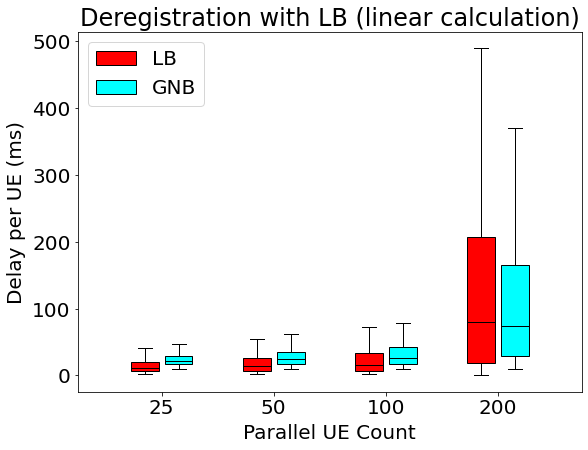

In [48]:
#
# Deregistration with LB
#

dataBox = [l25d, g25d, l50d, g50d, l100d, g100d, l200d, g200d]
 
fig = plt.figure(figsize =(7, 5))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
ax.set_title('Deregistration with LB (linear calculation)')
 
## Creating plot
# L plots

color_L = ['black', 'red']
box_L = plt.boxplot(dataBox[::2], positions=[1.2,3.2,5.2,7.2], patch_artist=True, showfliers=False,)

for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
        plt.setp(box_L[element], color=color_L[0])
for patch in box_L['boxes']:
        patch.set(facecolor=color_L[1])

# G plots

color_G = ['black', 'cyan']
box_G = plt.boxplot(dataBox[1::2], positions=[1.8,3.8,5.8,7.8], patch_artist=True, showfliers=False)

for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
        plt.setp(box_G[element], color=color_G[0])
for patch in box_G['boxes']:
        patch.set(facecolor=color_G[1])

ax.legend([box_L["boxes"][0], box_G["boxes"][0]], ['LB', 'GNB'])
ax.set_xlim(0,9)
ax.set_xticks([1.5,3.5,5.5,7.5])
ax.set_xticklabels([25,50,100,200])


plt.xlabel("Parallel UE Count",  
           color='black', 
           weight='normal', 
           #size = 15,
           labelpad = 6)
plt.ylabel("Delay per UE (ms)",  
           color='black', 
           weight='normal', 
           #size = 15,
           labelpad = 6)
# show plot
plt.show()

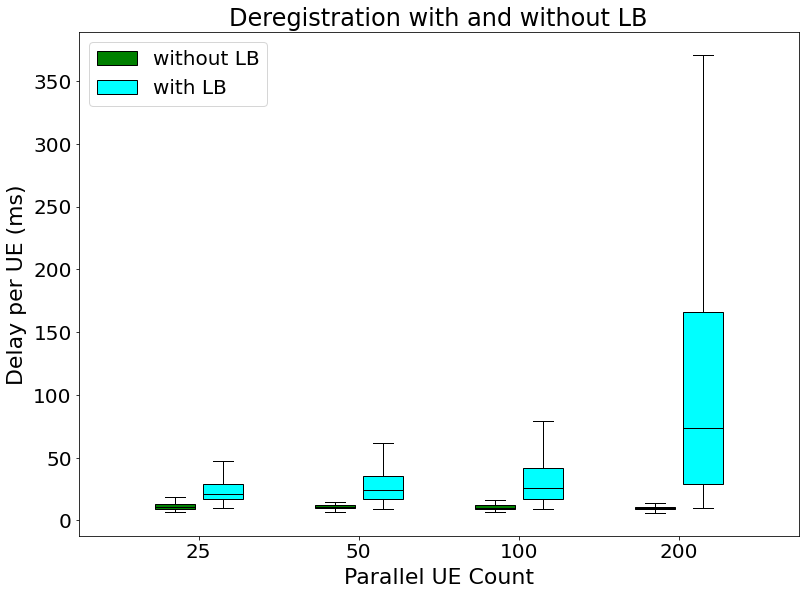

In [25]:
#
# Deregistration with and without LB
#

dataBox = [ n25d, g25d, n50d, g50d, n100d, g100d, n200d, g200d]
 
fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
ax.set_title('Deregistration with and without LB')
 
## Creating plot
# L plots

color_L = ['black', 'green']
box_L = plt.boxplot(dataBox[::2], positions=[1.2,3.2,5.2,7.2], patch_artist=True, showfliers=False,)

for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
        plt.setp(box_L[element], color=color_L[0])
for patch in box_L['boxes']:
        patch.set(facecolor=color_L[1])

# G plots

color_G = ['black', 'cyan']
box_G = plt.boxplot(dataBox[1::2], positions=[1.8,3.8,5.8,7.8], patch_artist=True, showfliers=False)

for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
        plt.setp(box_G[element], color=color_G[0])
for patch in box_G['boxes']:
        patch.set(facecolor=color_G[1])

ax.legend([box_L["boxes"][0], box_G["boxes"][0]], ['without LB', 'with LB'])
ax.set_xlim(0,9)
ax.set_xticks([1.5,3.5,5.5,7.5])
ax.set_xticklabels([25,50,100,200])


plt.xlabel("Parallel UE Count",  
           color='black', 
           weight='normal', 
           size = 22,
           labelpad = 6)
plt.ylabel("Delay per UE (ms)",  
           color='black', 
           weight='normal', 
           size = 22,
           labelpad = 6)
# show plot
plt.show()

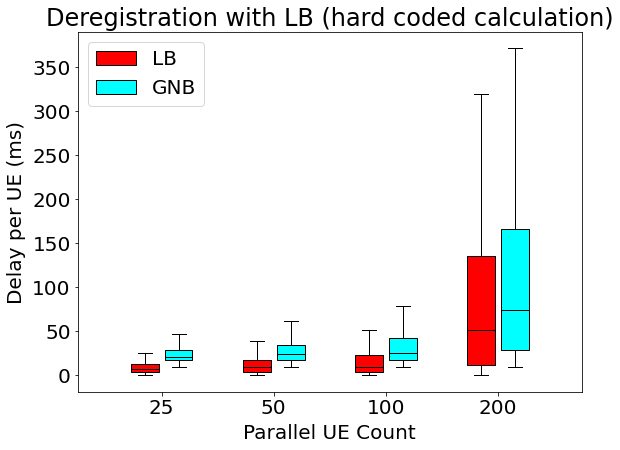

In [5]:
#
# Deregistration with LB
#

dataBox = [c25d, g25d, c50d, g50d, c100d, g100d, c200d, g200d]
 
fig = plt.figure(figsize =(7, 5))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
ax.set_title('Deregistration with LB (hard coded calculation)')
 
## Creating plot
# L plots

color_L = ['black', 'red']
box_L = plt.boxplot(dataBox[::2], positions=[1.2,3.2,5.2,7.2], patch_artist=True, showfliers=False,)

for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
        plt.setp(box_L[element], color=color_L[0])
for patch in box_L['boxes']:
        patch.set(facecolor=color_L[1])

# G plots

color_G = ['black', 'cyan']
box_G = plt.boxplot(dataBox[1::2], positions=[1.8,3.8,5.8,7.8], patch_artist=True, showfliers=False)

for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
        plt.setp(box_G[element], color=color_G[0])
for patch in box_G['boxes']:
        patch.set(facecolor=color_G[1])

ax.legend([box_L["boxes"][0], box_G["boxes"][0]], ['LB', 'GNB'])
ax.set_xlim(0,9)
ax.set_xticks([1.5,3.5,5.5,7.5])
ax.set_xticklabels([25,50,100,200])


plt.xlabel("Parallel UE Count",  
           color='black', 
           weight='normal', 
           #size = 16,
           labelpad = 6)
plt.ylabel("Delay per UE (ms)",  
           color='black', 
           weight='normal', 
           #size = 16,
           labelpad = 6)
# show plot
plt.show()